In [1]:
import pandas as pd
# univariate lstm example
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('train-2.csv')
df.head()

/Users/saismailzain/opt/anaconda3/envs/tf/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [3]:
df.tail()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1
1017208,1115,2,2013-01-01,0,0,0,0,a,1


In [4]:
df.shape

(1017209, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [6]:
df2=df.reindex(index=df.index[::-1])

In [7]:
df2.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
1017208,1115,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017204,1111,2,2013-01-01,0,0,0,0,a,1


In [8]:
df2.tail()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
4,5,5,2015-07-31,4822,559,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
0,1,5,2015-07-31,5263,555,1,1,0,1


In [9]:
atr2=df2[df2.Store==682]

In [10]:
atr2.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
1016776,682,2,2013-01-01,3375,566,1,0,a,1
1015661,682,3,2013-01-02,10526,1742,1,0,0,1
1014546,682,4,2013-01-03,11041,1839,1,0,0,1
1013431,682,5,2013-01-04,11376,1855,1,0,0,1
1012316,682,6,2013-01-05,7593,1304,1,0,0,0


In [11]:
atr2.tail()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
5141,682,1,2015-07-27,14722,1990,1,1,0,1
4026,682,2,2015-07-28,13595,1876,1,1,0,1
2911,682,3,2015-07-29,12320,1828,1,1,0,1
1796,682,4,2015-07-30,13026,1837,1,1,0,1
681,682,5,2015-07-31,13979,2013,1,1,0,1


In [12]:
atr2.shape

(942, 9)

In [13]:
atr2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 942 entries, 1016776 to 681
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Store          942 non-null    int64 
 1   DayOfWeek      942 non-null    int64 
 2   Date           942 non-null    object
 3   Sales          942 non-null    int64 
 4   Customers      942 non-null    int64 
 5   Open           942 non-null    int64 
 6   Promo          942 non-null    int64 
 7   StateHoliday   942 non-null    object
 8   SchoolHoliday  942 non-null    int64 
dtypes: int64(7), object(2)
memory usage: 73.6+ KB


In [14]:
atr2.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,942.0,942.000000,942.000000,942.000000,942.0,942.000000,942.000000
mean,682.0,3.997877,11207.408705,1758.842887,1.0,0.382166,0.183652
std,0.0,1.998404,3253.524235,362.326000,0.0,0.486175,0.387406
min,682.0,1.000000,3375.000000,566.000000,1.0,0.000000,0.000000
25%,682.0,2.000000,8252.000000,1425.750000,1.0,0.000000,0.000000
50%,682.0,4.000000,11113.500000,1834.500000,1.0,0.000000,0.000000
75%,682.0,6.000000,13646.000000,2024.000000,1.0,1.000000,0.000000
max,682.0,7.000000,22052.000000,2816.000000,1.0,1.000000,1.000000


In [15]:
atr2.Sales.value_counts()

11447    3
11231    3
10754    2
11410    2
7742     2
        ..
14287    1
13732    1
7927     1
8490     1
13979    1
Name: Sales, Length: 903, dtype: int64

In [16]:
atr2=atr2.set_index('Date')

In [17]:
atr2.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
Date,,,,,,,,
2013-01-01,682,2,3375,566,1,0,a,1
2013-01-02,682,3,10526,1742,1,0,0,1
2013-01-03,682,4,11041,1839,1,0,0,1
2013-01-04,682,5,11376,1855,1,0,0,1
2013-01-05,682,6,7593,1304,1,0,0,0


In [18]:
atr2=atr2.drop(columns=['Store', 'DayOfWeek', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday'])

In [19]:
atr2.head()

,Sales
Date,
2013-01-01,3375
2013-01-02,10526
2013-01-03,11041
2013-01-04,11376
2013-01-05,7593


In [20]:
atr2.tail()

,Sales
Date,
2015-07-27,14722
2015-07-28,13595
2015-07-29,12320
2015-07-30,13026
2015-07-31,13979


<AxesSubplot:xlabel='Date'>

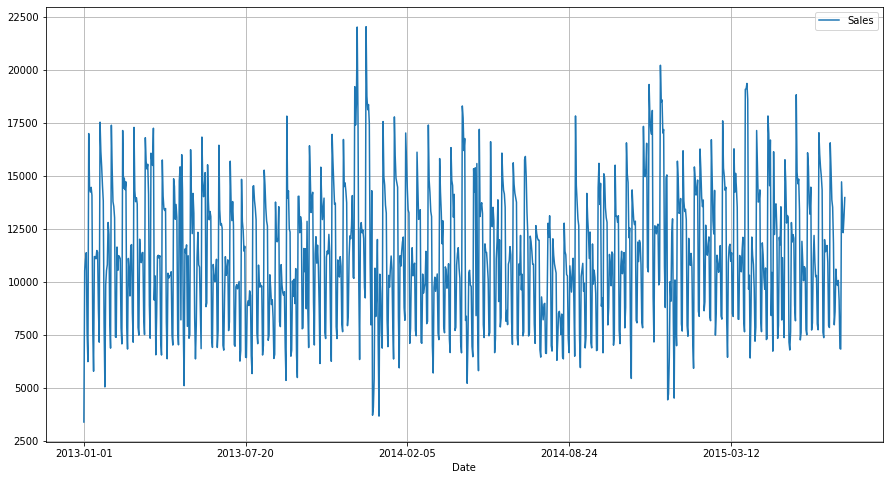

In [21]:
atr2.plot(figsize=(15,8), grid=True)

In [22]:
df1=atr2.reset_index()['Sales']

In [23]:
df1

0       3375
1      10526
2      11041
3      11376
4       7593
       ...  
937    14722
938    13595
939    12320
940    13026
941    13979
Name: Sales, Length: 942, dtype: int64

In [24]:
df1.shape

(942,)

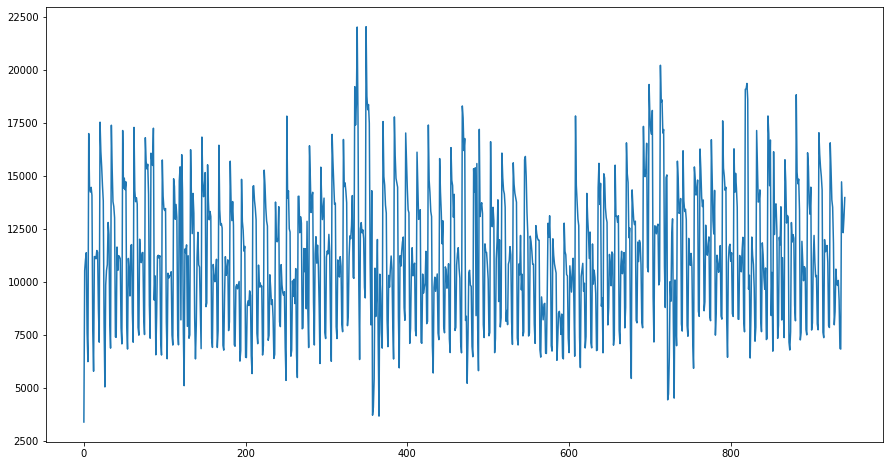

In [25]:
plt.rcParams['figure.figsize']=[15,8]
plt.plot(df1)

In [26]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0.5,1)) ## Scaling range is btw 0-1.
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [27]:
df1

array([[0.5       ],
       [0.69143867],
       [0.70522568],
       [0.71419393],
       [0.61291963],
       [0.57637736],
       [0.86483375],
       [0.79731756],
       [0.79086577],
       [0.79680891],
       [0.78666274],
       [0.61532901],
       [0.56425015],
       [0.70924131],
       [0.70918777],
       [0.70643037],
       [0.71692456],
       [0.71478289],
       [0.64255501],
       [0.60100659],
       [0.87923649],
       [0.84218558],
       [0.82288376],
       [0.79921829],
       [0.77967554],
       [0.6234406 ],
       [0.54438614],
       [0.67339508],
       [0.69189377],
       [0.69901483],
       [0.752396  ],
       [0.73697596],
       [0.62788456],
       [0.59348396],
       [0.87538149],
       [0.82004605],
       [0.77873856],
       [0.7727151 ],
       [0.75831236],
       [0.60767254],
       [0.60705681],
       [0.72134176],
       [0.69184023],
       [0.71041923],
       [0.7089736 ],
       [0.70653745],
       [0.61907694],
       [0.598

In [28]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [29]:
training_size,test_size

(612, 330)

In [30]:
train_data

array([[0.5       ],
       [0.69143867],
       [0.70522568],
       [0.71419393],
       [0.61291963],
       [0.57637736],
       [0.86483375],
       [0.79731756],
       [0.79086577],
       [0.79680891],
       [0.78666274],
       [0.61532901],
       [0.56425015],
       [0.70924131],
       [0.70918777],
       [0.70643037],
       [0.71692456],
       [0.71478289],
       [0.64255501],
       [0.60100659],
       [0.87923649],
       [0.84218558],
       [0.82288376],
       [0.79921829],
       [0.77967554],
       [0.6234406 ],
       [0.54438614],
       [0.67339508],
       [0.69189377],
       [0.69901483],
       [0.752396  ],
       [0.73697596],
       [0.62788456],
       [0.59348396],
       [0.87538149],
       [0.82004605],
       [0.77873856],
       [0.7727151 ],
       [0.75831236],
       [0.60767254],
       [0.60705681],
       [0.72134176],
       [0.69184023],
       [0.71041923],
       [0.7089736 ],
       [0.70653745],
       [0.61907694],
       [0.598

In [31]:
test_data

array([[0.74846067],
       [0.6072442 ],
       [0.56888151],
       [0.68413021],
       [0.69213471],
       [0.7007014 ],
       [0.66525673],
       [0.67556353],
       [0.59369813],
       [0.6080741 ],
       [0.7891792 ],
       [0.75879424],
       [0.73922471],
       [0.70688547],
       [0.74029555],
       [0.600257  ],
       [0.59377844],
       [0.72519677],
       [0.67443915],
       [0.6920544 ],
       [0.68316646],
       [0.66260641],
       [0.59037854],
       [0.59128875],
       [0.79640735],
       [0.82719387],
       [0.7752048 ],
       [0.80184184],
       [0.64646356],
       [0.65679713],
       [0.58751405],
       [0.81396905],
       [0.80861487],
       [0.77100177],
       [0.75841945],
       [0.7526637 ],
       [0.62277132],
       [0.64432189],
       [0.71197194],
       [0.69901483],
       [0.67235102],
       [0.71510414],
       [0.71240028],
       [0.59720512],
       [0.60938588],
       [0.82486481],
       [0.76072174],
       [0.760

In [32]:
len(train_data), len(test_data)

(612, 330)

In [33]:
atr2.iloc[0:612] #train

,Sales
Date,
2013-01-01,3375
2013-01-02,10526
2013-01-03,11041
2013-01-04,11376
2013-01-05,7593
...,...
2014-08-31,6485
2014-09-01,17835
2014-09-02,14563


Train ranges from the date 2013/01/01 to 2014/09/04

In [34]:
atr2.iloc[612:]  #test

,Sales
Date,
2014-09-05,12656
2014-09-06,7381
2014-09-07,5948
2014-09-08,10253
2014-09-09,10552
...,...
2015-07-27,14722
2015-07-28,13595
2015-07-29,12320


Test ranges from the date 2014/09/05 to 2015/07/31

In [35]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [36]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [37]:
print(X_train)

[[0.5        0.69143867 0.70522568 ... 0.83142368 0.78569899 0.76960968]
 [0.69143867 0.70522568 0.71419393 ... 0.78569899 0.76960968 0.76752155]
 [0.70522568 0.71419393 0.61291963 ... 0.76960968 0.76752155 0.77006479]
 ...
 [0.58772822 0.60563795 0.70645714 ... 0.70712641 0.65163035 0.58325748]
 [0.60563795 0.70645714 0.72843604 ... 0.65163035 0.58325748 0.88710714]
 [0.70645714 0.72843604 0.78104085 ... 0.58325748 0.88710714 0.79951277]]


In [38]:
print(y_train)

[0.76752155 0.77006479 0.6266531  0.5800182  0.68822616 0.68201531
 0.68471917 0.68554907 0.69007335 0.60986775 0.59733897 0.80765112
 0.79817422 0.75646517 0.77517803 0.75863361 0.6169085  0.59766022
 0.80505434 0.82274991 0.62919634 0.83816994 0.79140119 0.6152487
 0.5459924  0.71882529 0.71331049 0.72404562 0.62097767 0.71031215
 0.60593243 0.61013546 0.84440756 0.78575253 0.73828773 0.78915243
 0.76409488 0.63307812 0.57983081 0.62207528 0.70819725 0.7399743
 0.69877389 0.6960968  0.64726669 0.59281469 0.86041656 0.80556299
 0.78500294 0.79605932 0.81549499 0.64590138 0.65055951 0.82534668
 0.77927397 0.7557959  0.76631686 0.75986507 0.6059592  0.5943674
 0.69930931 0.68439792 0.67746426 0.68795845 0.70584141 0.59431386
 0.61535579 0.85008299 0.76888687 0.74904963 0.75103068 0.74540879
 0.59696418 0.59091396 0.66043797 0.709161   0.6855223  0.69197409
 0.7051186  0.61565027 0.62670664 0.82989774 0.78002356 0.7547786
 0.77881887 0.74846067 0.59757991 0.59581303 0.67085185 0.67374311

In [39]:
print(X_train.shape), print(y_train.shape)

(511, 100)
(511,)


(None, None)

In [40]:
print(X_test.shape), print(ytest.shape)

(229, 100)
(229,)


(None, None)

In [41]:
X_train.shape

(511, 100)

In [42]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],1,X_train.shape[1] )
X_test = X_test.reshape(X_test.shape[0],1,X_test.shape[1])

In [43]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.callbacks import EarlyStopping

In [44]:
model=Sequential()
model.add(LSTM(50, input_shape=(1,100)))
model.add(Dense(50,activation='relu'))
model.add(Dense(1))
model.compile(loss='mae',optimizer='adam', metrics=['mape'])

2022-03-23 14:18:10.670981: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2022-03-23 14:18:10.672873: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 8. Tune using inter_op_parallelism_threads for best performance.


In [45]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 50)                30200     
_________________________________________________________________
dense (Dense)                (None, 50)                2550      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 32,801
Trainable params: 32,801
Non-trainable params: 0
_________________________________________________________________


In [46]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=150,batch_size=64,verbose=1)

Train on 511 samples, validate on 229 samples
Epoch 1/150


2022-03-23 14:18:34.989005: W tensorflow/core/grappler/optimizers/implementation_selector.cc:310] Skipping optimization due to error while loading function libraries: Invalid argument: Functions '__inference___backward_cudnn_lstm_with_fallback_2436_2618' and '__inference___backward_standard_lstm_2741_3226_specialized_for_StatefulPartitionedCall_at___inference_distributed_function_3347' both implement 'lstm_9601fdac-8f79-4ca1-a462-8477a77be594' but their signatures do not match.


 64/511 [==>...........................] - ETA: 13s - loss: 0.5532 - mape: 79.5973

2022-03-23 14:18:36.188502: W tensorflow/core/grappler/optimizers/implementation_selector.cc:310] Skipping optimization due to error while loading function libraries: Invalid argument: Functions '__inference_standard_lstm_3564' and '__inference_standard_lstm_3564_specialized_for_sequential_lstm_StatefulPartitionedCall_at___inference_distributed_function_3925' both implement 'lstm_d7c3224b-43d7-4755-a511-2e8b80a93976' but their signatures do not match.


511/511 [==============================] - 2s 5ms/sample - loss: 0.2592 - mape: 37.1898 - val_loss: 0.1830 - val_mape: 27.1498
Epoch 2/150
511/511 [==============================] - 0s 167us/sample - loss: 0.1121 - mape: 16.4521 - val_loss: 0.1127 - val_mape: 14.6066
Epoch 3/150
511/511 [==============================] - 0s 164us/sample - loss: 0.0793 - mape: 11.0382 - val_loss: 0.0839 - val_mape: 12.5246
Epoch 4/150
511/511 [==============================] - 0s 164us/sample - loss: 0.0723 - mape: 10.5804 - val_loss: 0.0755 - val_mape: 9.9263
Epoch 5/150
511/511 [==============================] - 0s 166us/sample - loss: 0.0667 - mape: 9.4294 - val_loss: 0.0672 - val_mape: 9.4889
Epoch 6/150
511/511 [==============================] - 0s 165us/sample - loss: 0.0655 - mape: 9.2008 - val_loss: 0.0708 - val_mape: 9.3497
Epoch 7/150
511/511 [==============================] - 0s 164us/sample - loss: 0.0629 - mape: 8.9187 - val_loss: 0.0644 - val_mape: 9.0491
Epoch 8/150
511/511 [=============

In [47]:
modela=Sequential()
modela.add(LSTM(30, input_shape=(1,100)))
modela.add(Dense(30,activation='relu'))
modela.add(Dense(1))
modela.compile(loss='mae',optimizer='adam', metrics=['mape'])

In [48]:
modela.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 30)                15720     
_________________________________________________________________
dense_2 (Dense)              (None, 30)                930       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 31        
Total params: 16,681
Trainable params: 16,681
Non-trainable params: 0
_________________________________________________________________


In [49]:
modela.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=150,batch_size=64,verbose=1)

Train on 511 samples, validate on 229 samples
Epoch 1/150


2022-03-23 14:19:36.985029: W tensorflow/core/grappler/optimizers/implementation_selector.cc:310] Skipping optimization due to error while loading function libraries: Invalid argument: Functions '__inference___backward_standard_lstm_13082_13567_specialized_for_StatefulPartitionedCall_at___inference_distributed_function_13688' and '__inference___backward_cudnn_lstm_with_fallback_12777_12959' both implement 'lstm_ac9e14b7-be5d-4fe9-a619-f6b8d4ad224f' but their signatures do not match.


 64/511 [==>...........................] - ETA: 12s - loss: 0.4101 - mape: 59.0822

2022-03-23 14:19:38.154189: W tensorflow/core/grappler/optimizers/implementation_selector.cc:310] Skipping optimization due to error while loading function libraries: Invalid argument: Functions '__inference_standard_lstm_13905_specialized_for_sequential_1_lstm_1_StatefulPartitionedCall_at___inference_distributed_function_14266' and '__inference_standard_lstm_13905' both implement 'lstm_0c211c71-fdf6-4a7c-86f7-5535a5646afe' but their signatures do not match.


511/511 [==============================] - 2s 4ms/sample - loss: 0.1907 - mape: 27.3803 - val_loss: 0.1052 - val_mape: 15.8682
Epoch 2/150
511/511 [==============================] - 0s 157us/sample - loss: 0.0914 - mape: 12.7744 - val_loss: 0.0853 - val_mape: 11.4442
Epoch 3/150
511/511 [==============================] - 0s 143us/sample - loss: 0.0809 - mape: 12.0386 - val_loss: 0.0745 - val_mape: 10.4946
Epoch 4/150
511/511 [==============================] - 0s 142us/sample - loss: 0.0751 - mape: 10.4842 - val_loss: 0.0730 - val_mape: 10.4689
Epoch 5/150
511/511 [==============================] - 0s 140us/sample - loss: 0.0711 - mape: 10.4806 - val_loss: 0.0750 - val_mape: 10.1562
Epoch 6/150
511/511 [==============================] - 0s 150us/sample - loss: 0.0685 - mape: 9.7510 - val_loss: 0.0703 - val_mape: 10.1506
Epoch 7/150
511/511 [==============================] - 0s 136us/sample - loss: 0.0660 - mape: 9.4540 - val_loss: 0.0680 - val_mape: 9.2947
Epoch 8/150
511/511 [=========

***Let's Hypertune***

In [50]:
import tensorflow as tf
from tensorflow import keras

In [51]:
!pip install -q -U keras-tuner

In [52]:
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers
from kerastuner.tuners import RandomSearch

/Users/saismailzain/opt/anaconda3/envs/tf/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  after removing the cwd from sys.path.


In [53]:
import pandas as pd
# univariate lstm example
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
import matplotlib.pyplot as plt 
from tensorflow.keras.layers import Dropout

***Hypertune***

In [54]:
def build_model(hp):
    model = Sequential()
    model.add(LSTM(hp.Int('input_unit',min_value=30,max_value=300,step=30),return_sequences=True, input_shape=(1,100)))
    for i in range(hp.Int('n_layers', 1, 4)):
        model.add(LSTM(hp.Int(f'lstm_{i}_units',min_value=30,max_value=300,step=30),return_sequences=True))
    model.add(LSTM(hp.Int('layer_2_neurons',min_value=30,max_value=300,step=30)))
    model.add(Dense(hp.Int(f'rnn_{i}_units',min_value=16,max_value=256,step=16),activation="relu"))
    model.add(Dropout(hp.Float('Dropout_rate',min_value=0,max_value=0.5,step=0.1)))
    model.add(Dense(1, activation='linear'))
    model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),loss='mae',metrics=['mape'])
    return model

In [55]:
tuner= RandomSearch(
        build_model,
        objective='mape',
        max_trials=5,
        executions_per_trial=3,
        directory='proj6a',
        project_name='Rossmann forecasting'
        )

In [56]:
tuner.search_space_summary()

Search space summary
Default search space size: 7
input_unit (Int)
{'default': None, 'conditions': [], 'min_value': 30, 'max_value': 300, 'step': 30, 'sampling': None}
n_layers (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 4, 'step': 1, 'sampling': None}
lstm_0_units (Int)
{'default': None, 'conditions': [], 'min_value': 30, 'max_value': 300, 'step': 30, 'sampling': None}
layer_2_neurons (Int)
{'default': None, 'conditions': [], 'min_value': 30, 'max_value': 300, 'step': 30, 'sampling': None}
rnn_0_units (Int)
{'default': None, 'conditions': [], 'min_value': 16, 'max_value': 256, 'step': 16, 'sampling': None}
Dropout_rate (Float)
{'default': 0.0, 'conditions': [], 'min_value': 0.0, 'max_value': 0.5, 'step': 0.1, 'sampling': None}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}


In [57]:
tuner.search(
        x=X_train,
        y=y_train,
        epochs=100,
        batch_size=128,
        validation_data=(X_test,ytest),
)

Trial 5 Complete [00h 02m 05s]
mape: 13.793753623962402

Best mape So Far: 9.10329818725586
Total elapsed time: 00h 08m 56s
INFO:tensorflow:Oracle triggered exit


In [58]:
tuner.results_summary()

Results summary
Results in proj6a/Rossmann forecasting
Showing 10 best trials
Trial summary
Hyperparameters:
input_unit: 90
n_layers: 2
lstm_0_units: 180
layer_2_neurons: 210
rnn_0_units: 176
Dropout_rate: 0.1
learning_rate: 0.001
lstm_1_units: 30
rnn_1_units: 16
Score: 9.10329818725586
Trial summary
Hyperparameters:
input_unit: 150
n_layers: 4
lstm_0_units: 240
layer_2_neurons: 180
rnn_0_units: 16
Dropout_rate: 0.0
learning_rate: 0.001
lstm_1_units: 90
rnn_1_units: 176
lstm_2_units: 30
lstm_3_units: 30
rnn_3_units: 16
Score: 9.7236967086792
Trial summary
Hyperparameters:
input_unit: 210
n_layers: 1
lstm_0_units: 270
layer_2_neurons: 270
rnn_0_units: 160
Dropout_rate: 0.5
learning_rate: 0.001
lstm_1_units: 270
rnn_1_units: 64
Score: 10.081809997558594
Trial summary
Hyperparameters:
input_unit: 180
n_layers: 3
lstm_0_units: 120
layer_2_neurons: 150
rnn_0_units: 192
Dropout_rate: 0.2
learning_rate: 0.001
lstm_1_units: 240
rnn_1_units: 32
lstm_2_units: 90
lstm_3_units: 90
rnn_3_units: 16


In [60]:
from tensorflow.keras import optimizers

In [61]:
modelcc=Sequential()
modelcc.add(LSTM(90, return_sequences=True, input_shape=(1,100)))
modelcc.add(LSTM(180, return_sequences=True))
modelcc.add(LSTM(30, return_sequences=True))
modelcc.add(LSTM(210))
modelcc.add(Dense(176, activation='relu'))
modelcc.add(Dropout(0.1))
modelcc.add(Dense(16, activation='relu'))
modelcc.add(Dense(1))
sgd=optimizers.SGD(lr=0.001)
modelcc.compile(loss='mae',optimizer='adam', metrics=['mape'])

In [62]:
modelcc.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_5 (LSTM)                (None, 1, 90)             68760     
_________________________________________________________________
lstm_6 (LSTM)                (None, 1, 180)            195120    
_________________________________________________________________
lstm_7 (LSTM)                (None, 1, 30)             25320     
_________________________________________________________________
lstm_8 (LSTM)                (None, 210)               202440    
_________________________________________________________________
dense_2 (Dense)              (None, 176)               37136     
_________________________________________________________________
dropout_1 (Dropout)          (None, 176)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 16)               

In [63]:
modelcc.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=150,batch_size=64,verbose=1)

Train on 511 samples, validate on 229 samples
Epoch 1/150


2022-03-23 14:41:38.534645: W tensorflow/core/grappler/optimizers/implementation_selector.cc:310] Skipping optimization due to error while loading function libraries: Invalid argument: Functions '__inference___backward_standard_lstm_295249_295734_specialized_for_StatefulPartitionedCall_1_at___inference_distributed_function_296963' and '__inference___backward_standard_lstm_295249_295734' both implement 'lstm_8d570f56-4b7e-4df1-af1b-c16a23edec12' but their signatures do not match.


448/511 [=========================>....] - ETA: 0s - loss: 0.6691 - mape: 95.2004

2022-03-23 14:41:42.413305: W tensorflow/core/grappler/optimizers/implementation_selector.cc:310] Skipping optimization due to error while loading function libraries: Invalid argument: Functions '__inference_cudnn_lstm_with_fallback_298229' and '__inference_standard_lstm_298118_specialized_for_sequential_1_lstm_7_StatefulPartitionedCall_at___inference_distributed_function_298956' both implement 'lstm_fb82e357-67b1-4b87-ad38-b0c7fd140531' but their signatures do not match.


511/511 [==============================] - 7s 14ms/sample - loss: 0.6606 - mape: 94.0191 - val_loss: 0.5950 - val_mape: 82.3424
Epoch 2/150
511/511 [==============================] - 0s 593us/sample - loss: 0.3955 - mape: 55.8659 - val_loss: 0.0782 - val_mape: 11.4345
Epoch 3/150
511/511 [==============================] - 0s 617us/sample - loss: 0.1321 - mape: 19.7799 - val_loss: 0.1206 - val_mape: 15.5995
Epoch 4/150
511/511 [==============================] - 0s 586us/sample - loss: 0.0999 - mape: 13.5305 - val_loss: 0.0763 - val_mape: 11.0676
Epoch 5/150
511/511 [==============================] - 0s 583us/sample - loss: 0.0849 - mape: 12.7326 - val_loss: 0.0828 - val_mape: 10.9961
Epoch 6/150
511/511 [==============================] - 0s 588us/sample - loss: 0.0832 - mape: 11.4630 - val_loss: 0.0740 - val_mape: 10.2596
Epoch 7/150
511/511 [==============================] - 0s 594us/sample - loss: 0.0764 - mape: 11.1639 - val_loss: 0.0775 - val_mape: 10.4708
Epoch 8/150
511/511 [=====

In [64]:
#Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

2022-03-23 14:43:37.343077: W tensorflow/core/grappler/optimizers/implementation_selector.cc:310] Skipping optimization due to error while loading function libraries: Invalid argument: Functions '__inference_standard_lstm_305612' and '__inference_standard_lstm_305612_specialized_for_sequential_lstm_StatefulPartitionedCall_at___inference_distributed_function_305921' both implement 'lstm_de1f3326-e95a-4b62-a32b-3fd03962891d' but their signatures do not match.


In [65]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [66]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

12128.695611491285

In [67]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

12686.962700256703

In [68]:
print(test_predict)

[[10736.8955]
 [17498.812 ]
 [17661.664 ]
 [17324.516 ]
 [17082.305 ]
 [16521.352 ]
 [10779.174 ]
 [ 8843.658 ]
 [14090.445 ]
 [14172.298 ]
 [13146.949 ]
 [11150.851 ]
 [10087.995 ]
 [ 7389.8145]
 [ 8934.096 ]
 [16740.494 ]
 [16809.197 ]
 [16570.008 ]
 [15009.272 ]
 [12465.796 ]
 [ 8230.775 ]
 [ 7689.54  ]
 [13786.002 ]
 [14344.446 ]
 [12339.906 ]
 [12616.744 ]
 [13350.959 ]
 [ 9820.07  ]
 [ 7857.9614]
 [13878.635 ]
 [14755.072 ]
 [12877.288 ]
 [12204.1455]
 [13752.282 ]
 [ 9733.933 ]
 [ 8583.065 ]
 [14847.843 ]
 [14992.959 ]
 [13318.39  ]
 [13062.8955]
 [13220.414 ]
 [ 8777.115 ]
 [ 8629.623 ]
 [14944.413 ]
 [15376.543 ]
 [14063.614 ]
 [13510.313 ]
 [14602.183 ]
 [ 9645.925 ]
 [ 8681.377 ]
 [14708.802 ]
 [15304.378 ]
 [13414.062 ]
 [12530.644 ]
 [13906.056 ]
 [ 9418.735 ]
 [ 9293.642 ]
 [15995.266 ]
 [15243.451 ]
 [13358.404 ]
 [12281.838 ]
 [13803.97  ]
 [ 8877.256 ]
 [ 9054.924 ]
 [15447.5   ]
 [15944.977 ]
 [13624.656 ]
 [12596.066 ]
 [13564.648 ]
 [ 8996.33  ]
 [ 7523.986 ]
 [1330

In [69]:
len(train_predict)

511

In [70]:
len(test_predict)

229

In [71]:
test_data.shape

(330, 1)

In [72]:
test_predict.shape

(229, 1)

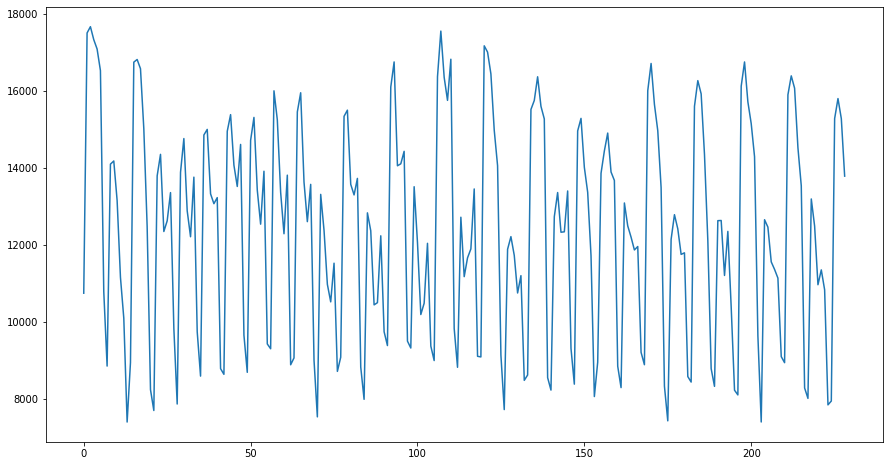

In [73]:
plt.plot(test_predict)

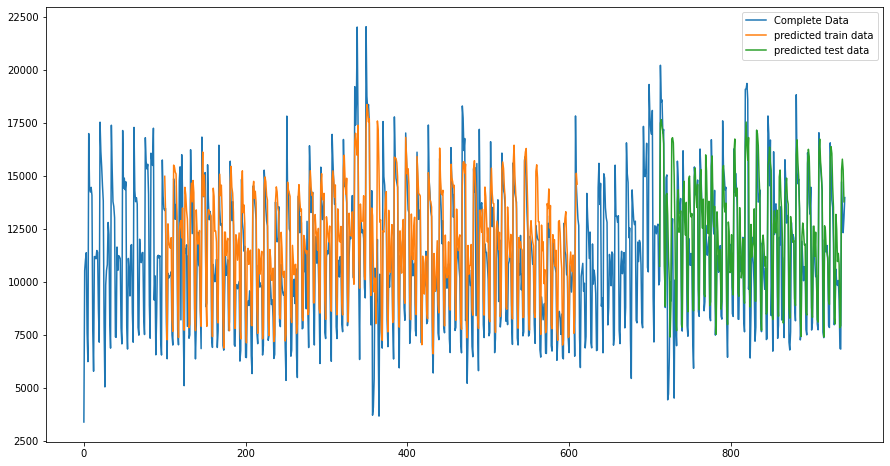

In [74]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1), label='Complete Data')
plt.plot(trainPredictPlot, label='predicted train data')
plt.plot(testPredictPlot, label='predicted test data')
plt.legend()
plt.show()

In [75]:
len(test_data)

330

In [76]:
x_input=test_data[230:].reshape(1,-1)
x_input.shape

(1, 100)

In [77]:
temp_input=list(x_input) # converting to a list
temp_input=temp_input[0].tolist() # storing the values here

In [78]:
temp_input #All my test_data is present here (previous 100 days data)

[0.6679605932430261,
 0.6948385715050597,
 0.604299405686138,
 0.6057450339990362,
 0.8871071371205226,
 0.8644321893237672,
 0.7989238100337313,
 0.8566686298656101,
 0.6346843711516839,
 0.6891899127268833,
 0.5896289553996894,
 0.8418375542110617,
 0.7371098142099909,
 0.7753118809230605,
 0.775900840606093,
 0.742999411040317,
 0.6058253466830862,
 0.6223162178079992,
 0.7335760561117952,
 0.7240723884992237,
 0.7722332280344809,
 0.6290624832681908,
 0.7079563098998769,
 0.6393692777212614,
 0.6067623279970017,
 0.8317181560207743,
 0.8040370509182417,
 0.7516464100230229,
 0.7612303903196445,
 0.7593296567971302,
 0.6010601274294587,
 0.5910745837125877,
 0.6143384911923757,
 0.7522889114954221,
 0.7276329174921026,
 0.7370295015259409,
 0.7325319912191466,
 0.6475076297049848,
 0.6280451892702255,
 0.9139583444878728,
 0.8161642662097768,
 0.801306419660545,
 0.8072495582802377,
 0.7685656154628688,
 0.6038443004765219,
 0.6132676554050436,
 0.7285431279113348,
 0.70335171601434

In [79]:
len(temp_input)

100

In [80]:
# demonstrate prediction for next 80 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<80):
    
    if(len(temp_input)>100): # Now if there are greater than 100 elements, start from the 1st index element
        
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1,1,n_steps))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1,1, n_steps)) # All the previous 100 days data will be passed here
        yhat = model.predict(x_input, verbose=0) # it will be predicted here
        print(yhat[0]) # I obtain my yhat value
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist()) # Now I'm adding my yhat value inside my final o/p i.e lst_output
        i=i+1                            # Now I'm also adding my yhat value in my previous i/p i.e temp_input
                                         # Now temp_input will have 101 elements.
    

print(lst_output)

[0.6600021]
101
1 day input [0.69483857 0.60429941 0.60574503 0.88710714 0.86443219 0.79892381
 0.85666863 0.63468437 0.68918991 0.58962896 0.84183755 0.73710981
 0.77531188 0.77590084 0.74299941 0.60582535 0.62231622 0.73357606
 0.72407239 0.77223323 0.62906248 0.70795631 0.63936928 0.60676233
 0.83171816 0.80403705 0.75164641 0.76123039 0.75932966 0.60106013
 0.59107458 0.61433849 0.75228891 0.72763292 0.7370295  0.73253199
 0.64750763 0.62804519 0.91395834 0.81616427 0.80130642 0.80724956
 0.76856562 0.6038443  0.61326766 0.72854313 0.70335172 0.67874926
 0.69649837 0.69430315 0.6169085  0.61024254 0.84055255 0.8231247
 0.77681105 0.76289019 0.79704985 0.61631954 0.62534133 0.70426193
 0.73598544 0.70209348 0.68380896 0.68536167 0.62402956 0.61661402
 0.86587782 0.83854473 0.82202709 0.81059592 0.79340901 0.61350859
 0.60670879 0.73071157 0.71534508 0.7171655  0.7233228  0.70206671
 0.62183434 0.61953204 0.8531081  0.82012636 0.78085346 0.77175135
 0.7262676  0.62295872 0.63961022 0

In [81]:
lst_output

[[0.6600021123886108],
 [0.6340171694755554],
 [0.7772298455238342],
 [0.7526626586914062],
 [0.7488951086997986],
 [0.7303354144096375],
 [0.7193608283996582],
 [0.6398730874061584],
 [0.6359977126121521],
 [0.8029287457466125],
 [0.8157266974449158],
 [0.8055971264839172],
 [0.7992938160896301],
 [0.8037703633308411],
 [0.6561356782913208],
 [0.6615056395530701],
 [0.798363208770752],
 [0.7936455011367798],
 [0.7728184461593628],
 [0.7586671710014343],
 [0.7549216747283936],
 [0.6568078994750977],
 [0.6429610252380371],
 [0.8031089901924133],
 [0.8323971629142761],
 [0.8052179217338562],
 [0.8031758069992065],
 [0.8003842234611511],
 [0.6834843754768372],
 [0.6782817840576172],
 [0.8189098238945007],
 [0.8228727579116821],
 [0.8023984432220459],
 [0.7896525859832764],
 [0.7754033207893372],
 [0.6695348620414734],
 [0.6666527390480042],
 [0.8181500434875488],
 [0.832123339176178],
 [0.8081004023551941],
 [0.8027571439743042],
 [0.808698296546936],
 [0.6913238167762756],
 [0.6877334117

In [82]:
len(lst_output)

80

In [83]:
fnl_output=scaler.inverse_transform(lst_output)

In [84]:
fnl_output

array([[ 9351.71890616],
       [ 8381.07734859],
       [13730.6436497 ],
       [12812.96095276],
       [12672.22789037],
       [11978.94906986],
       [11569.00438404],
       [ 8599.81930697],
       [ 8455.05855691],
       [14690.60036862],
       [15168.65505636],
       [14790.27506268],
       [14554.82120621],
       [14722.03815186],
       [ 9207.29212689],
       [ 9407.88165987],
       [14520.05930042],
       [14343.83404946],
       [13565.86023784],
       [13037.25350559],
       [12897.3442378 ],
       [ 9232.40227699],
       [ 8715.16613674],
       [14697.33321965],
       [15791.3636235 ],
       [14776.11024845],
       [14699.82909465],
       [14595.55228317],
       [10228.87536156],
       [10034.53776169],
       [15287.55756176],
       [15435.58899903],
       [14670.79144812],
       [14194.68269682],
       [13662.41564476],
       [ 9707.8052367 ],
       [ 9600.1464144 ],
       [15259.17672443],
       [15781.13521159],
       [14883.78242958],


In [85]:
import matplotlib.pyplot as plt

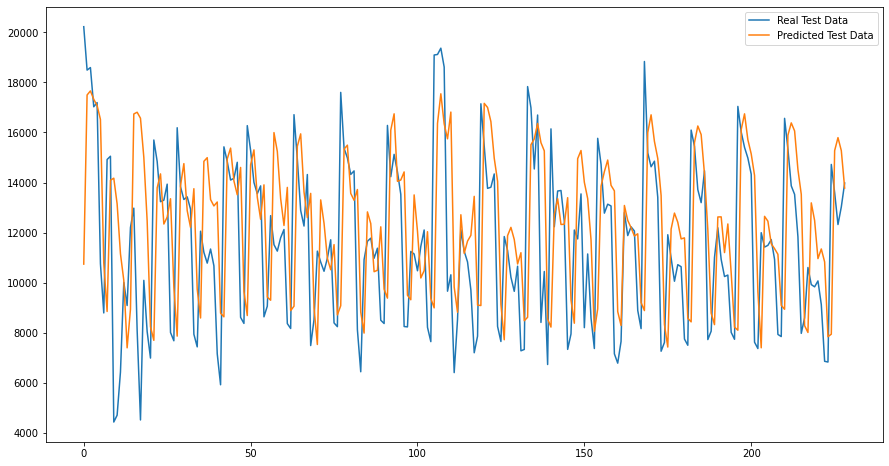

In [86]:
plt.plot(scaler.inverse_transform(df1[713:]),label='Real Test Data')
plt.plot(test_predict, label='Predicted Test Data')
plt.legend()
plt.show()

In [87]:
date = pd.date_range(start='2015/08/01', periods=80, freq='D')
date

DatetimeIndex(['2015-08-01', '2015-08-02', '2015-08-03', '2015-08-04',
               '2015-08-05', '2015-08-06', '2015-08-07', '2015-08-08',
               '2015-08-09', '2015-08-10', '2015-08-11', '2015-08-12',
               '2015-08-13', '2015-08-14', '2015-08-15', '2015-08-16',
               '2015-08-17', '2015-08-18', '2015-08-19', '2015-08-20',
               '2015-08-21', '2015-08-22', '2015-08-23', '2015-08-24',
               '2015-08-25', '2015-08-26', '2015-08-27', '2015-08-28',
               '2015-08-29', '2015-08-30', '2015-08-31', '2015-09-01',
               '2015-09-02', '2015-09-03', '2015-09-04', '2015-09-05',
               '2015-09-06', '2015-09-07', '2015-09-08', '2015-09-09',
               '2015-09-10', '2015-09-11', '2015-09-12', '2015-09-13',
               '2015-09-14', '2015-09-15', '2015-09-16', '2015-09-17',
               '2015-09-18', '2015-09-19', '2015-09-20', '2015-09-21',
               '2015-09-22', '2015-09-23', '2015-09-24', '2015-09-25',
      

In [88]:
ff=pd.DataFrame(fnl_output, columns=['Forecast'])

In [89]:
ff

,Forecast
0,9351.718906
1,8381.077349
2,13730.643650
3,12812.960953
4,12672.227890
...,...
75,16234.026314
76,16057.694192
77,11992.250013
78,11149.661760


In [90]:
ff['Time_Stamp'] = pd.DataFrame(date)

In [91]:
ff

,Forecast,Time_Stamp
0,9351.718906,2015-08-01
1,8381.077349,2015-08-02
2,13730.643650,2015-08-03
3,12812.960953,2015-08-04
4,12672.227890,2015-08-05
...,...,...
75,16234.026314,2015-10-15
76,16057.694192,2015-10-16
77,11992.250013,2015-10-17
78,11149.661760,2015-10-18


In [92]:
ff=ff.set_index('Time_Stamp')

In [93]:
ff

,Forecast
Time_Stamp,
2015-08-01,9351.718906
2015-08-02,8381.077349
2015-08-03,13730.643650
2015-08-04,12812.960953
2015-08-05,12672.227890
...,...
2015-10-15,16234.026314
2015-10-16,16057.694192
2015-10-17,11992.250013


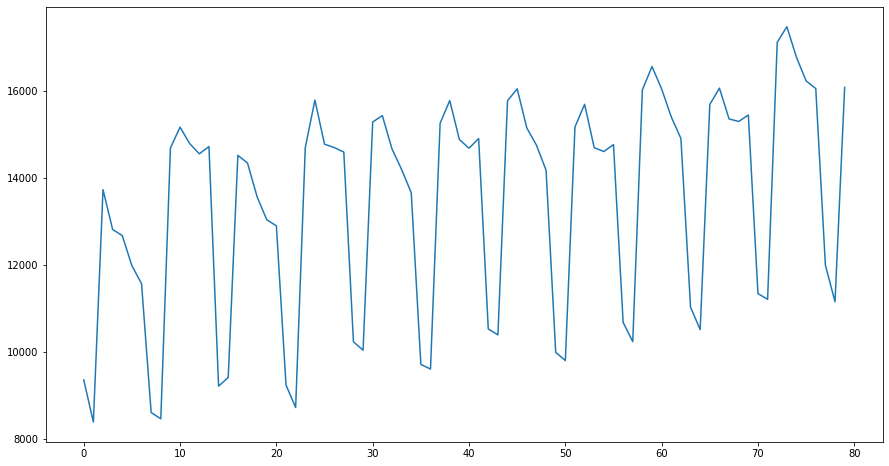

In [94]:
plt.plot(fnl_output)

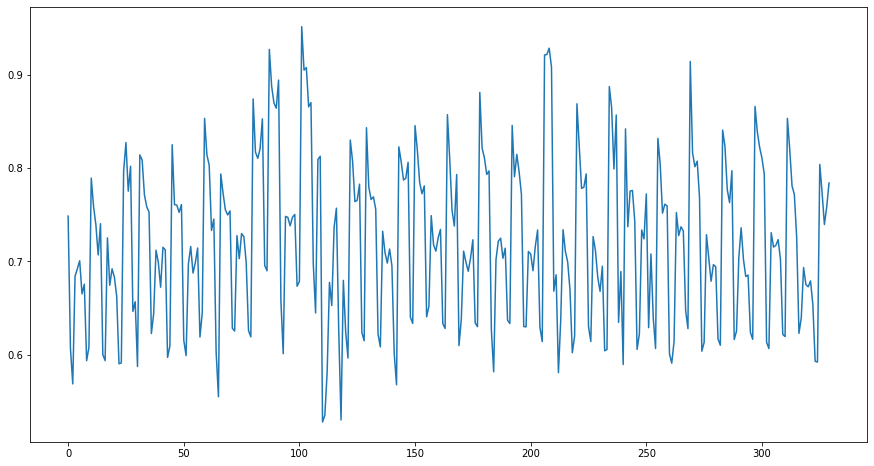

In [95]:
plt.plot(test_data)

In [96]:
day_new1=np.arange(1,331)
day_pred1=np.arange(331,411)

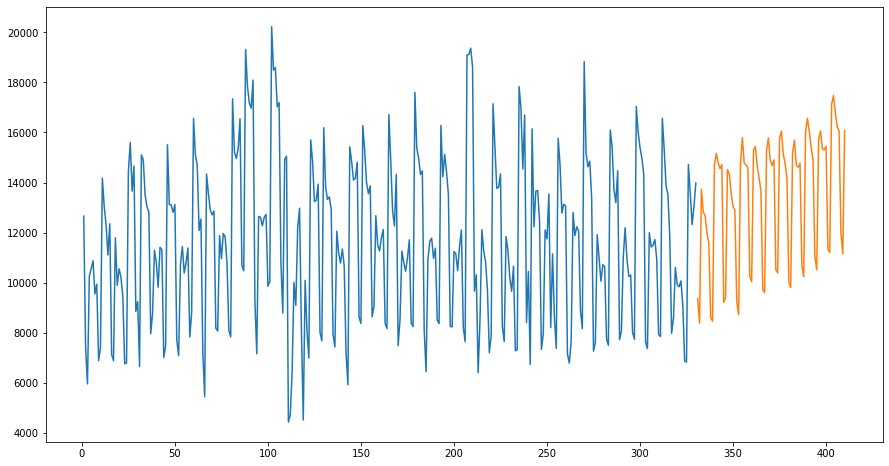

In [97]:
plt.plot(day_new1,scaler.inverse_transform(df1[612:]))
plt.plot(day_pred1,fnl_output)

In [98]:
daynew2=np.arange(1,230)
day3fore=np.arange(230,310)

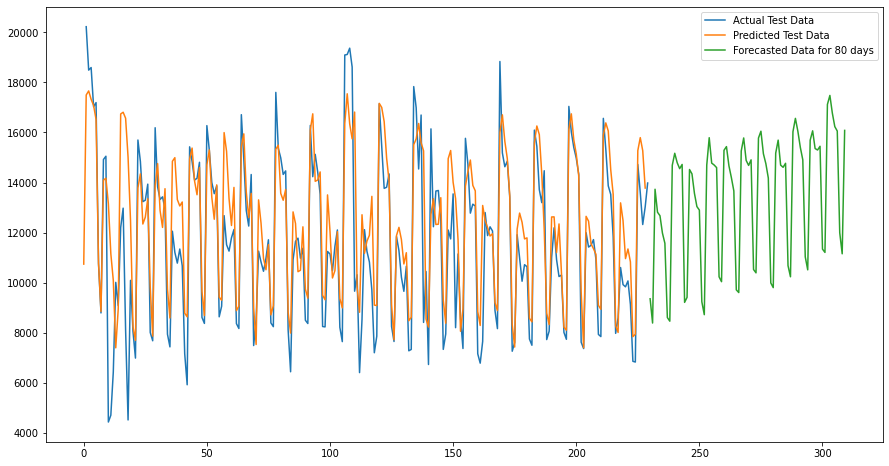

In [99]:
plt.plot(daynew2,scaler.inverse_transform(df1[713:]), label='Actual Test Data')
plt.plot(test_predict,label='Predicted Test Data')
plt.plot(day3fore,fnl_output, label='Forecasted Data for 80 days')
plt.legend()
plt.show()

In [100]:
vv=atr2.iloc[212:292]
vv.head()

,Sales
Date,
2013-08-01,13479
2013-08-02,12925
2013-08-03,7569
2013-08-04,7075
2013-08-05,10789


In [101]:
vv.tail()

,Sales
Date,
2013-10-15,12130
2013-10-16,10883
2013-10-17,11730
2013-10-18,10715
2013-10-19,8836


In [102]:
len(vv)

80

In [103]:
jj=atr2.iloc[577:657]

In [104]:
jj.head()

,Sales
Date,
2014-08-01,11718
2014-08-02,6985
2014-08-03,6726
2014-08-04,12031
2014-08-05,11256


In [105]:
jj.tail()

,Sales
Date,
2014-10-15,9813
2014-10-16,11410
2014-10-17,11309
2014-10-18,7006
2014-10-19,7461


In [106]:
len(jj)

80

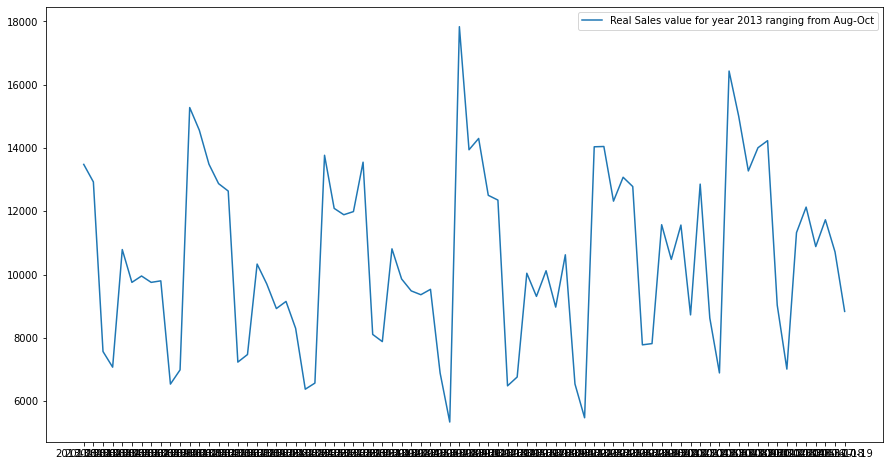

In [107]:
plt.plot(vv['Sales'], label='Real Sales value for year 2013 ranging from Aug-Oct')
plt.legend()
plt.show()

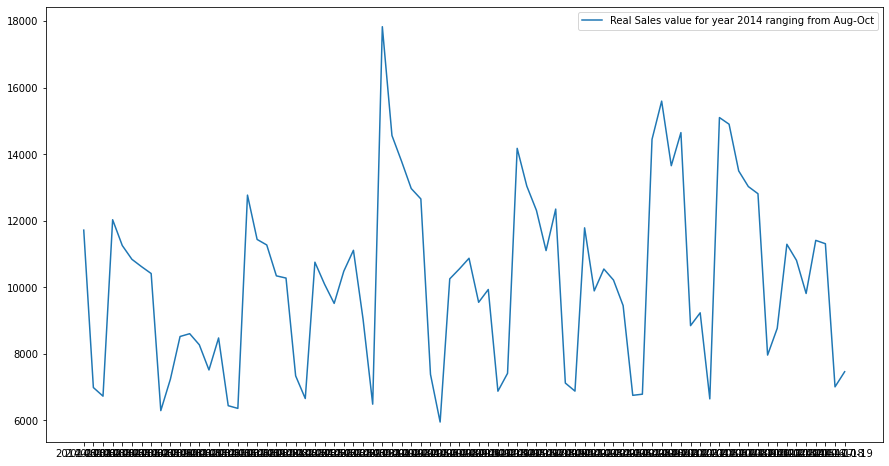

In [108]:
plt.plot(jj['Sales'],label='Real Sales value for year 2014 ranging from Aug-Oct')
plt.legend()
plt.show()

In [109]:
a1=vv.reset_index()['Sales']

In [110]:
a1

0     13479
1     12925
2      7569
3      7075
4     10789
      ...  
75    12130
76    10883
77    11730
78    10715
79     8836
Name: Sales, Length: 80, dtype: int64

In [111]:
len(a1)

80

In [112]:
b1=jj.reset_index()['Sales']

In [113]:
b1

0     11718
1      6985
2      6726
3     12031
4     11256
      ...  
75     9813
76    11410
77    11309
78     7006
79     7461
Name: Sales, Length: 80, dtype: int64

In [114]:
len(b1)

80

In [115]:
len(train_predict)

511

In [116]:
atr2.iloc[101:612]

,Sales
Date,
2013-04-12,13463
2013-04-13,8106
2013-04-14,6364
2013-04-15,10406
2013-04-16,10174
...,...
2014-08-31,6485
2014-09-01,17835
2014-09-02,14563


In [117]:
date1 = pd.date_range(start='2013/04/12', periods=511, freq='D')
date1

DatetimeIndex(['2013-04-12', '2013-04-13', '2013-04-14', '2013-04-15',
               '2013-04-16', '2013-04-17', '2013-04-18', '2013-04-19',
               '2013-04-20', '2013-04-21',
               ...
               '2014-08-26', '2014-08-27', '2014-08-28', '2014-08-29',
               '2014-08-30', '2014-08-31', '2014-09-01', '2014-09-02',
               '2014-09-03', '2014-09-04'],
              dtype='datetime64[ns]', length=511, freq='D')

In [118]:
njc=pd.DataFrame(train_predict, columns=['Predicted Train Data'])

In [119]:
njc

,Predicted Train Data
0,14983.370117
1,13357.898438
2,9185.686523
3,7261.304688
4,12737.634766
...,...
506,7569.174316
507,8464.799805
508,12973.344727
509,15126.040039


In [120]:
njc['time_Stamp'] = pd.DataFrame(date1)

In [121]:
njc

,Predicted Train Data,time_Stamp
0,14983.370117,2013-04-12
1,13357.898438,2013-04-13
2,9185.686523,2013-04-14
3,7261.304688,2013-04-15
4,12737.634766,2013-04-16
...,...,...
506,7569.174316,2014-08-31
507,8464.799805,2014-09-01
508,12973.344727,2014-09-02
509,15126.040039,2014-09-03


In [122]:
njc=njc.set_index('time_Stamp')

In [123]:
njc

,Predicted Train Data
time_Stamp,
2013-04-12,14983.370117
2013-04-13,13357.898438
2013-04-14,9185.686523
2013-04-15,7261.304688
2013-04-16,12737.634766
...,...
2014-08-31,7569.174316
2014-09-01,8464.799805
2014-09-02,12973.344727


In [124]:
njc.iloc[111:191]

,Predicted Train Data
time_Stamp,
2013-08-01,13935.231445
2013-08-02,14277.462891
2013-08-03,13731.948242
2013-08-04,8760.216797
2013-08-05,7566.663086
...,...
2013-10-15,13176.071289
2013-10-16,12451.292969
2013-10-17,12217.091797


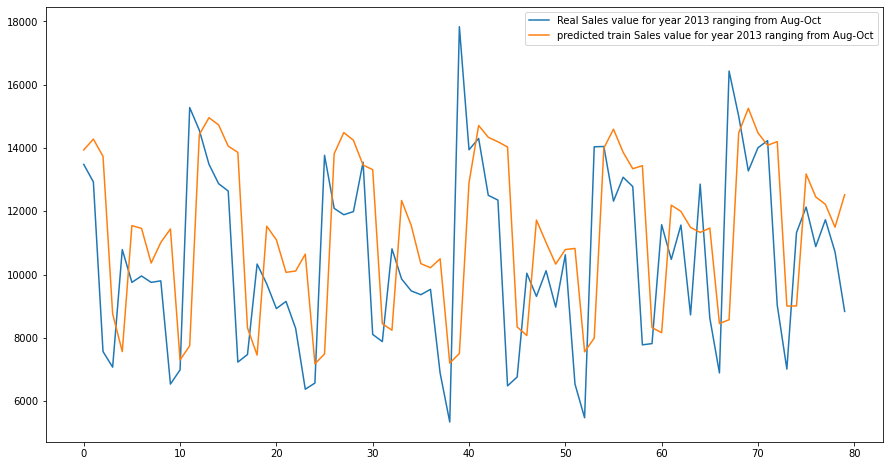

In [125]:
plt.plot(a1,label='Real Sales value for year 2013 ranging from Aug-Oct')
plt.plot(train_predict[111:191], label='predicted train Sales value for year 2013 ranging from Aug-Oct')
plt.legend()
plt.show()

In [126]:
daynewa=np.arange(1,81)
day3foreb=np.arange(81,161)

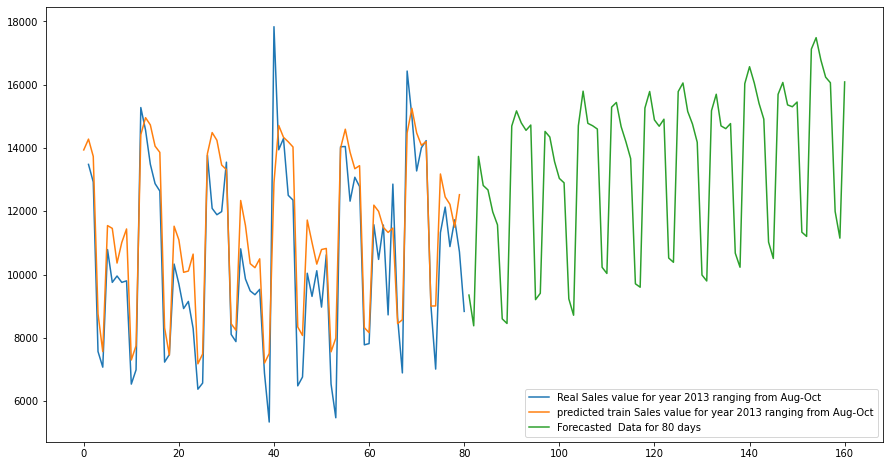

In [127]:
plt.plot(daynewa,a1,label='Real Sales value for year 2013 ranging from Aug-Oct')
plt.plot(train_predict[111:191], label='predicted train Sales value for year 2013 ranging from Aug-Oct')
plt.plot(day3foreb,fnl_output, label='Forecasted  Data for 80 days')
plt.legend()
plt.show()

In [128]:
nn=atr2.iloc[577:612]
nn.head()

,Sales
Date,
2014-08-01,11718
2014-08-02,6985
2014-08-03,6726
2014-08-04,12031
2014-08-05,11256


In [129]:
nn.tail()

,Sales
Date,
2014-08-31,6485
2014-09-01,17835
2014-09-02,14563
2014-09-03,13786
2014-09-04,12969


In [130]:
len(nn)

35

In [131]:
c1=nn.reset_index()['Sales']

In [132]:
c1

0     11718
1      6985
2      6726
3     12031
4     11256
5     10841
6     10620
7     10413
8      6291
9      7241
10     8520
11     8604
12     8270
13     7514
14     8476
15     6439
16     6358
17    12771
18    11438
19    11272
20    10343
21    10277
22     7337
23     6655
24    10754
25    10093
26     9515
27    10483
28    11112
29     9039
30     6485
31    17835
32    14563
33    13786
34    12969
Name: Sales, dtype: int64

In [133]:
len(c1)

35

In [134]:
njc.iloc[476:511]

,Predicted Train Data
time_Stamp,
2014-08-01,12544.839844
2014-08-02,13603.593750
2014-08-03,7957.524902
2014-08-04,7779.584961
2014-08-05,12225.592773
2014-08-06,11888.765625
2014-08-07,11989.829102
2014-08-08,10742.760742
2014-08-09,11484.939453


In [135]:
aar1=np.arange(1,36)
aar2=np.arange(36,71)

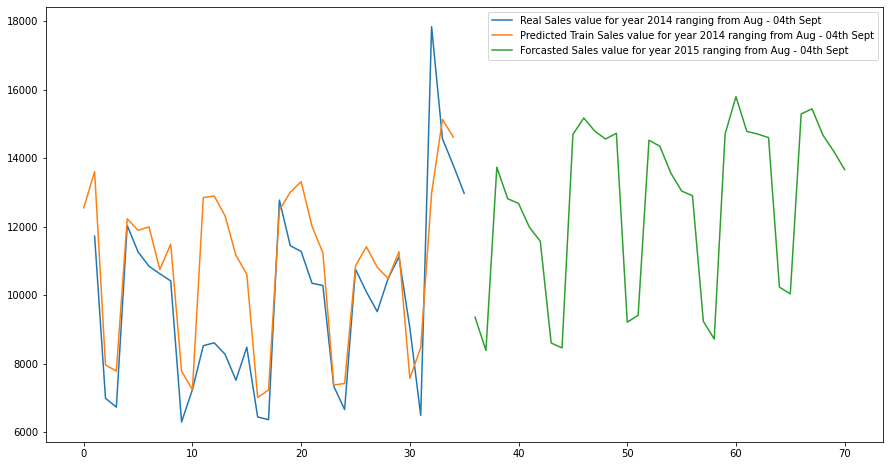

In [136]:
plt.plot(aar1,c1,label='Real Sales value for year 2014 ranging from Aug - 04th Sept')
plt.plot(train_predict[476:511], label='Predicted Train Sales value for year 2014 ranging from Aug - 04th Sept')
plt.plot(aar2,fnl_output[0:35], label='Forcasted Sales value for year 2015 ranging from Aug - 04th Sept')
plt.legend()
plt.show()

In [137]:
import jovian

In [138]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Committed successfully! https://jovian.ai/ismailzain1697/lstm-model-of-store-682


'https://jovian.ai/ismailzain1697/lstm-model-of-store-682'